In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

## LOADING THE DATASET 

In [2]:
df=pd.read_csv('RTA DATASET.csv')

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## DATA CLEANING AND PREPROCESSING 

In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.shape 

(12316, 32)

In [6]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


## RELATIONAL GRAPH 

### SCATTER PLOT

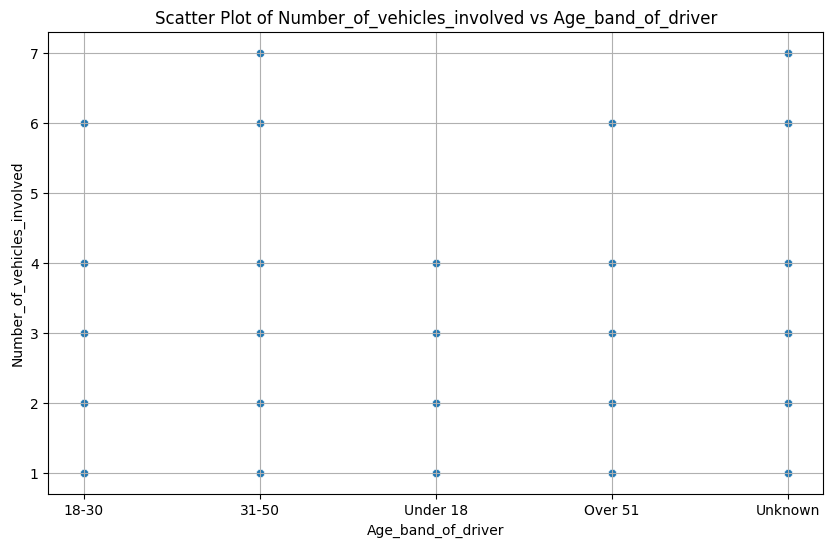

In [8]:
def create_scatter_plot(df, x_column, y_column):
    """
    Create a scatter plot using two columns from the traffic accident dataset.

    Args:
    - df: DataFrame containing the traffic accident dataset.
    - x_column: Name of the column to use for the x-axis.
    - y_column: Name of the column to use for the y-axis.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(f'Scatter Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()
create_scatter_plot(df, x_column='Age_band_of_driver', y_column='Number_of_vehicles_involved')


### LINE GRAPH

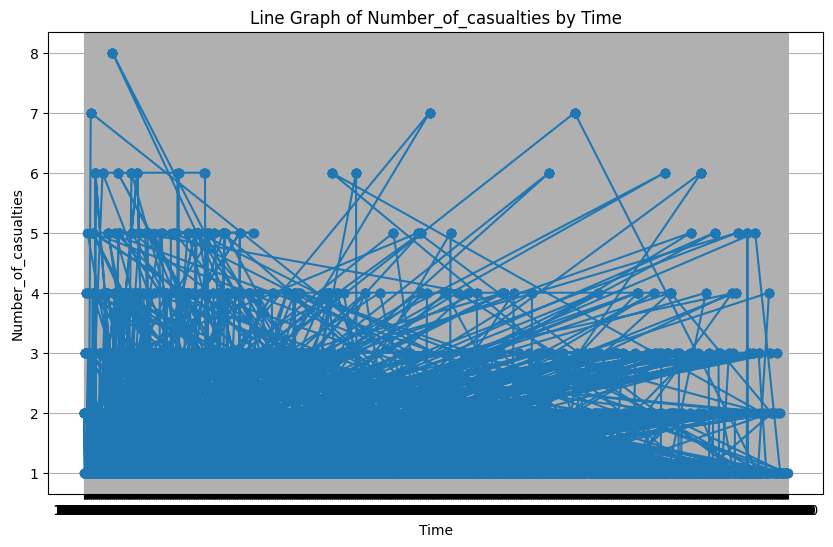

In [9]:
def create_line_graph(df, x_column, y_column):
    """
    Create a line graph based on the specified columns of the DataFrame.

    Args:
    - df: DataFrame containing the dataset.
    - x_column: Name of the column to be used for the x-axis.
    - y_column: Name of the column to be used for the y-axis.

    Returns:
    - None
    """
    # Extract the data for the line graph
    x_data = df[x_column]
    y_data = df[y_column]

    # Create the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, marker='o', linestyle='-')
    plt.title(f'Line Graph of {y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
create_line_graph(df, x_column='Time', y_column='Number_of_casualties')


## CATEGORICAL GRAPH

### LINE GRAPH

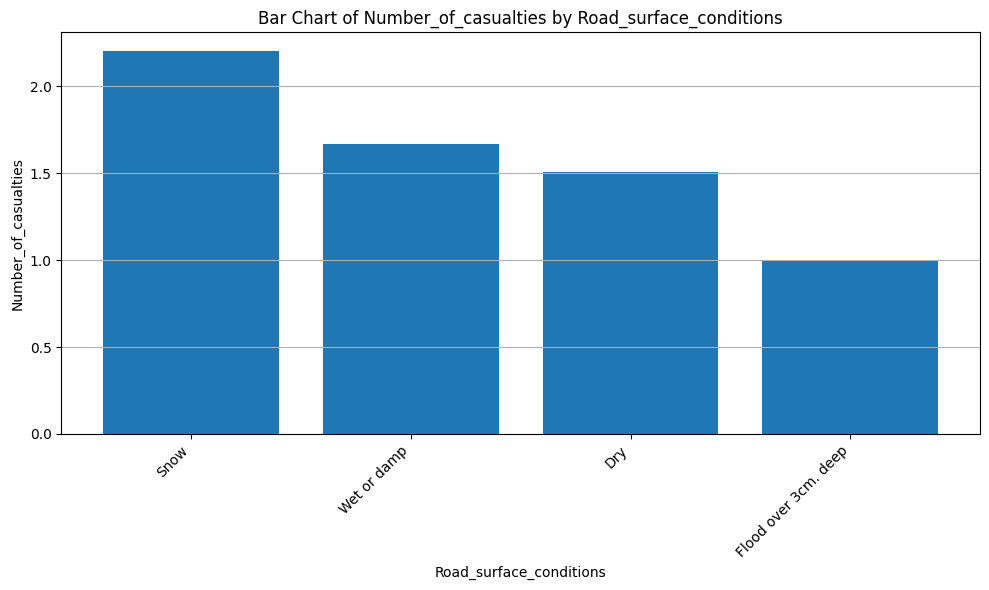

In [10]:
def create_bar_chart(df, category_column, value_column):
    """
    Create a bar chart based on the specified columns of the DataFrame.

    Args:
    - df: DataFrame containing the dataset.
    - category_column: Name of the column containing the categories.
    - value_column: Name of the column containing the values to be plotted.

    Returns:
    - None
    """
    # Group the data by the category column and calculate the mean of the value column
    grouped_data = df.groupby(category_column)[value_column].mean().reset_index()

    # Sort the data by the value column in descending order
    grouped_data = grouped_data.sort_values(by=value_column, ascending=False)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data[category_column], grouped_data[value_column])
    plt.title(f'Bar Chart of {value_column} by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y')  # Add grid lines along the y-axis
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
create_bar_chart(df, category_column='Road_surface_conditions', value_column='Number_of_casualties')


### PIE CHART

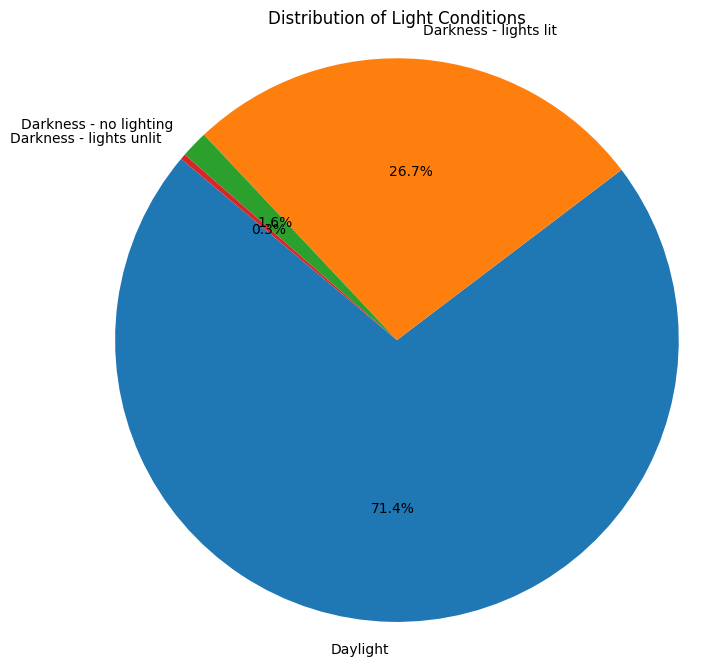

In [11]:
def create_pie_chart(df, category_column, graph_title):
    """
    Create a pie chart based on the specified column of the DataFrame.

    Args:
    - df: DataFrame containing the dataset.
    - category_column: Name of the column containing the categories.
    - graph_title: Title of the pie chart.

    Returns:
    - None
    """
    # Count the occurrences of each category in the specified column
    category_counts = df[category_column].value_counts()

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(graph_title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
create_pie_chart(df, category_column='Light_conditions', graph_title='Distribution of Light Conditions')


## STATISTICAL GRAPH

###  BOX PLOT 

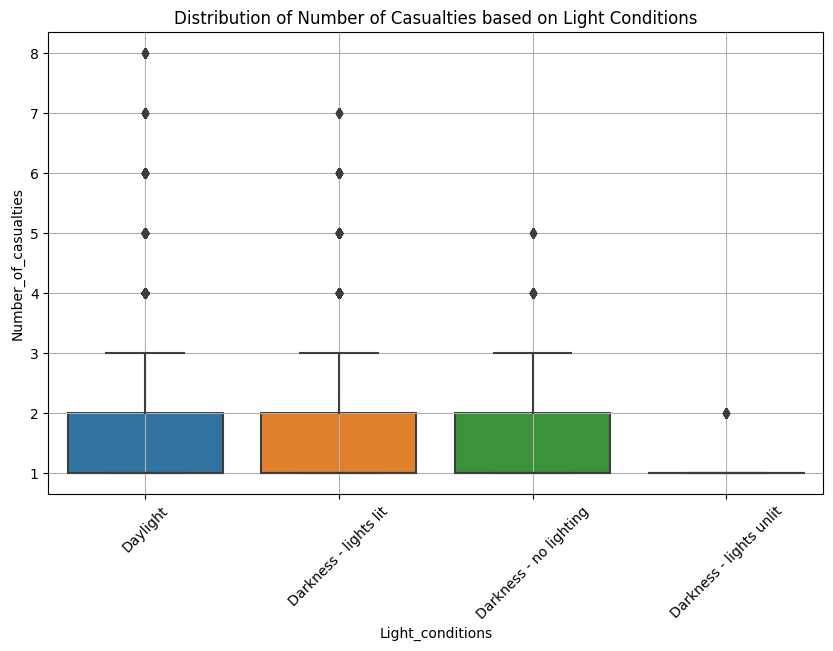

In [12]:
def create_box_plot(df, x_column, y_column, graph_title):
    """
    Create a box plot to visualize the statistical distribution.

    Args:
    - df: DataFrame containing the dataset.
    - x_column: Name of the column for the x-axis.
    - y_column: Name of the column for the y-axis.
    - graph_title: Title of the graph.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=df)
    plt.title(graph_title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
create_box_plot(df, x_column='Light_conditions', y_column='Number_of_casualties', graph_title='Distribution of Number of Casualties based on Light Conditions')


### VIOLIN PLOT 

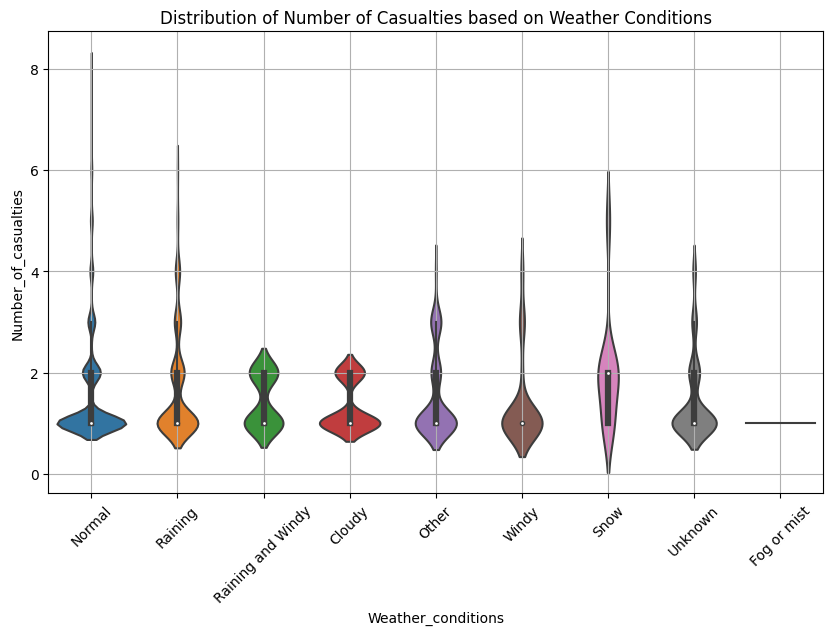

In [13]:
def create_violin_plot(df, x_column, y_column, graph_title):
    """
    Create a violin plot to visualize the statistical distribution.

    Args:
    - df: DataFrame containing the dataset.
    - x_column: Name of the column for the x-axis.
    - y_column: Name of the column for the y-axis.
    - graph_title: Title of the graph.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_column, y=y_column, data=df)
    plt.title(graph_title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
create_violin_plot(df, x_column='Weather_conditions', y_column='Number_of_casualties', graph_title='Distribution of Number of Casualties based on Weather Conditions')


## DATA ANALYSIS 

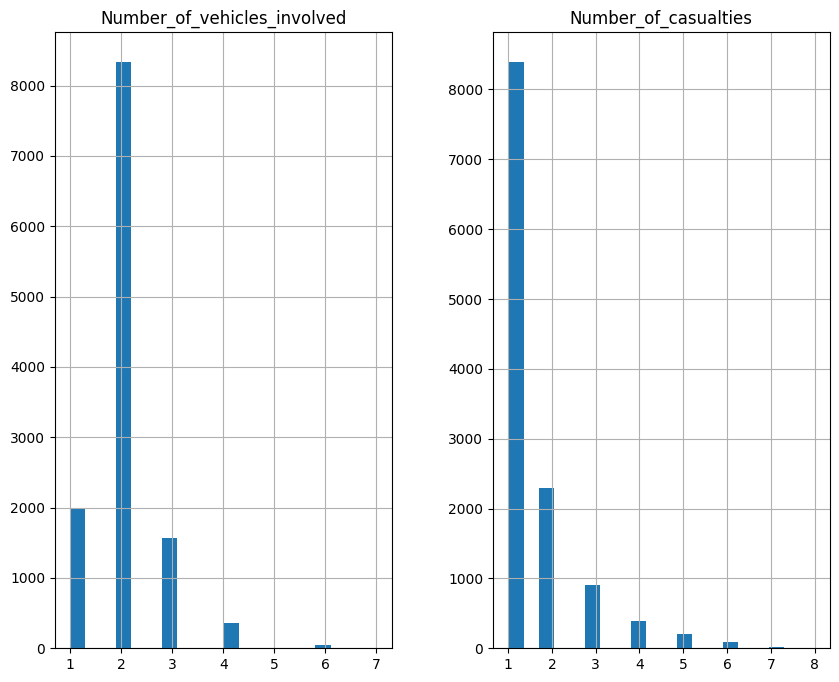

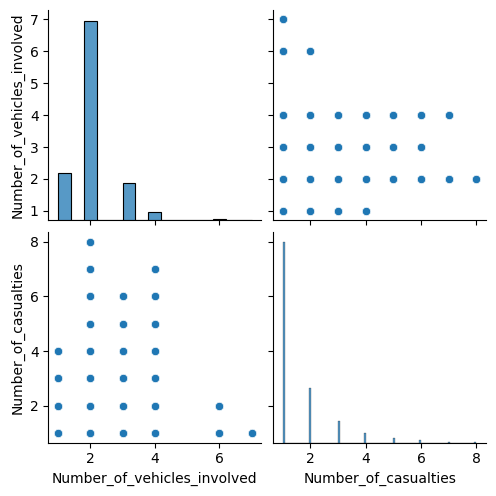

In [14]:
def perform_data_analysis(df):
    """
    Perform data analysis on the traffic accident dataset.

    Args:
    - df: DataFrame containing the traffic accident dataset.

    Returns:
    - analysis_results: Dictionary containing the analysis results.
    """
    # Remove non-numeric columns for correlation calculation
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_dist = df[numeric_cols].hist(figsize=(10, 8), bins=20)

    # Correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Pairplot for visualization of relationships
    sns.pairplot(df[numeric_cols])
    plt.show()

    # Store analysis results in a dictionary
    analysis_results = {
        'numeric_distribution': numeric_dist,
        'correlation_matrix': corr_matrix
    }

    return analysis_results

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
analysis_results = perform_data_analysis(df)


In [15]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [16]:
df=df.drop('Time',axis=1)

## STATISTCAL SUMMARY

Summary Statistics:
       Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

Correlation Matrix:
                             Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.213427
Number_of_casualties                            0.213427              1.000000

Additional Statistical Moments:
                             Skewness  Kurtosis
Number_of_vehicles_involved  1.323454  5.508156
Number_of_casualties         2.344769  6.218698



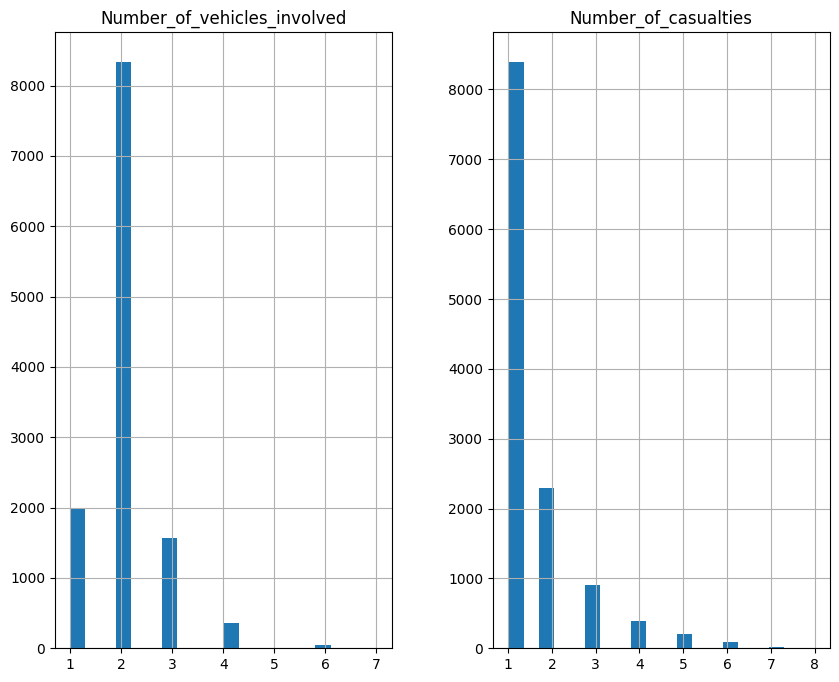

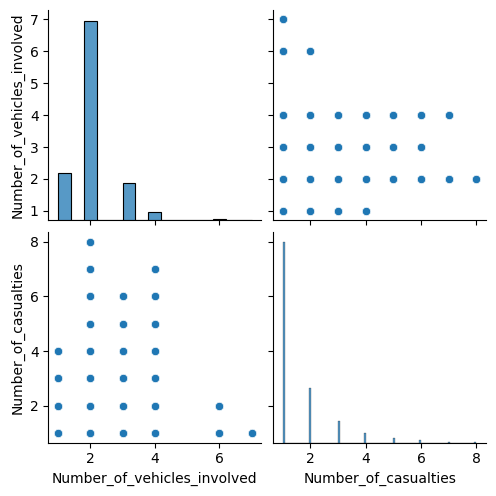

In [17]:

def perform_data_analysis(df):
    """
    Perform data analysis on the traffic accident dataset.

    Args:
    - df: DataFrame containing the traffic accident dataset.

    Returns:
    - analysis_results: Dictionary containing the analysis results.
    """
    # Summary statistics
    summary_stats = df.describe()

    # Correlation matrix (for numeric columns only)
    numeric_df = df.select_dtypes(include='number')
    corr_matrix = numeric_df.corr()

    # Additional statistical moments
    moments = numeric_df.skew().to_frame(name='Skewness').join(numeric_df.kurt().to_frame(name='Kurtosis'))

    # Display summary statistics
    print("Summary Statistics:")
    print(summary_stats)
    print()

    # Display correlation matrix
    print("Correlation Matrix:")
    print(corr_matrix)
    print()

    # Display additional statistical moments
    print("Additional Statistical Moments:")
    print(moments)
    print()

    # Visualization
    # Histograms for numeric columns
    numeric_df.hist(figsize=(10, 8), bins=20)
    plt.show()

    # Pairplot for visualization of relationships
    sns.pairplot(numeric_df)
    plt.show()

    # Store analysis results in a dictionary
    analysis_results = {
        'summary_statistics': summary_stats,
        'correlation_matrix': corr_matrix,
        'additional_moments': moments
    }

    return analysis_results

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
analysis_results = perform_data_analysis(df)


## CLUSTERING 

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

def perform_clustering(df, columns, n_clusters=3):
    """
    Perform KMeans clustering on the specified columns of the traffic accident dataset.

    Args:
    - df: DataFrame containing the traffic accident dataset.
    - columns: List of column names to use for clustering.
    - n_clusters: Number of clusters to form.

    Returns:
    - labels: Cluster labels for each data point.
    """
    # Select columns for clustering
    data = df[columns]

    # Encode categorical variables
    label_encoders = {}
    for col in data.select_dtypes(include='object').columns:
        label_encoders[col] = LabelEncoder()
        data.loc[:, col] = label_encoders[col].fit_transform(data[col])

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)

    return labels

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
columns_for_clustering = ['Age_band_of_driver', 'Sex_of_driver', 'Type_of_vehicle']
cluster_labels = perform_clustering(df, columns_for_clustering, n_clusters=4)

# Print cluster labels
print(cluster_labels)


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 0 1 ... 1 3 1]


## FITTING 

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

def perform_model_fitting_traffic_accident(df):
    """
    Fit a RandomForestRegressor model on the traffic accident dataset.

    Args:
    - df: DataFrame containing the traffic accident dataset.

    Returns:
    - rmse: Root Mean Squared Error of the fitted model.
    """
    # Encoding target variable
    label_encoder = LabelEncoder()
    df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

    # Selecting features and target variable
    X = df.drop(columns=['Accident_severity'])  # Assuming 'Accident_severity' is the target variable
    y = df['Accident_severity']

    # Preprocess categorical variables
    label_encoders = {}
    for col in X.select_dtypes(include='object'):
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predicting on the testing set
    y_pred = model.predict(X_test)

    # Calculating Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
rmse_traffic_accident = perform_model_fitting_traffic_accident(df)
print("Root Mean Squared Error for Traffic Accident Dataset:", rmse_traffic_accident)


Root Mean Squared Error for Traffic Accident Dataset: 0.40654816730328813


## Clustering  silhouette_scores

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def preprocess_data_for_clustering(df, columns_for_clustering):
    """
    Preprocess the data for clustering by handling non-numeric values and standardizing the data.

    Args:
    - df: DataFrame containing the traffic accident dataset.
    - columns_for_clustering: List of column names to use for clustering.

    Returns:
    - scaled_data: Preprocessed and standardized data ready for clustering.
    """
    # Filter the DataFrame to include only the selected columns
    data_for_clustering = df[columns_for_clustering]

    # Preprocessing steps
    # Define categorical and numerical columns
    categorical_cols = ['Sex_of_driver', 'Type_of_vehicle']
    numeric_cols = []

    # Define preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Apply preprocessing pipeline
    preprocessed_data = preprocessor.fit_transform(data_for_clustering)

    return preprocessed_data

def assess_clustering_quality(data, max_clusters):
    """
    Assess the clustering quality using silhouette scores for different numbers of clusters.

    Args:
    - data: Preprocessed data for clustering.
    - max_clusters: Maximum number of clusters to try.

    Returns:
    - silhouette_scores: Silhouette scores for different numbers of clusters.
    """
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    return silhouette_scores

# Example usage:
# Assuming df is your pandas DataFrame containing the traffic accident data
columns_for_clustering = ['Sex_of_driver', 'Type_of_vehicle']
scaled_data = preprocess_data_for_clustering(df, columns_for_clustering)
max_clusters = 10
silhouette_scores = assess_clustering_quality(scaled_data, max_clusters)

silhouette_scores


[0.30802914592941155,
 0.44035194352673235,
 0.5192130682998832,
 0.5820496557999253,
 0.6245371457065145,
 0.6840970914885762,
 0.6968027152601585,
 0.7650263487664826,
 0.7871924342259238]

##  K MEAN CLUSTERING 

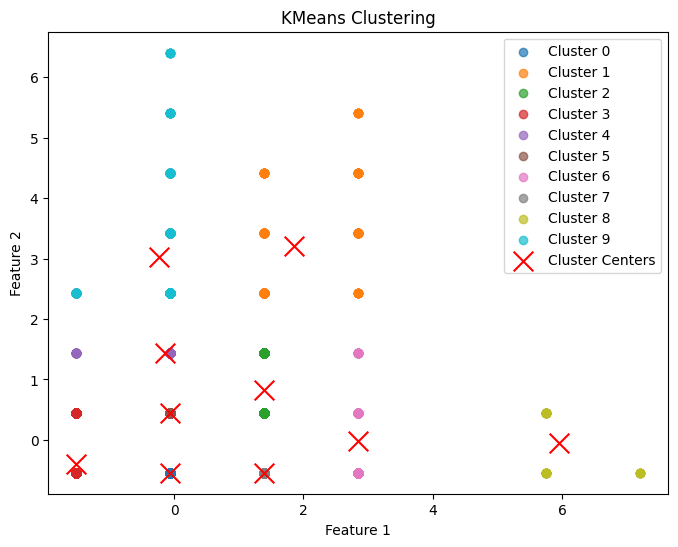

In [28]:

def preprocess_data(df):
    """
    Preprocesses the data by normalizing and scaling it.

    Args:
    - df (DataFrame): Input DataFrame containing the data.

    Returns:
    - scaled_data (array): Preprocessed data scaled using StandardScaler.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

def find_optimal_clusters(data, max_clusters=10):
    """
    Finds the optimal number of clusters using silhouette score.

    Args:
    - data (array): Input data for clustering.
    - max_clusters (int): Maximum number of clusters to consider.

    Returns:
    - optimal_clusters (int): Optimal number of clusters based on silhouette score.
    """
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters

def perform_clustering(data, n_clusters):
    """
    Performs KMeans clustering on the data.

    Args:
    - data (array): Input data for clustering.
    - n_clusters (int): Number of clusters to create.

    Returns:
    - cluster_labels (array): Cluster labels for each data point.
    - cluster_centers (array): Coordinates of the cluster centers.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

def plot_clusters(data, cluster_labels, cluster_centers):
    """
    Plots the clusters with colored groups and labeled cluster centers.

    Args:
    - data (array): Input data.
    - cluster_labels (array): Labels of the clusters.
    - cluster_centers (array): Coordinates of the cluster centers.
    """
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(cluster_labels))):
        plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1], label=f'Cluster {i}', alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()

# Assuming 'df' is your DataFrame containing the traffic accident data
# Selecting relevant features for clustering
features = ['Number_of_vehicles_involved', 'Number_of_casualties']  # Modify as needed

# Preprocess the data
scaled_data = preprocess_data(df[features])

# Find the optimal number of clusters
optimal_clusters = find_optimal_clusters(scaled_data)

# Perform clustering with optimal number of clusters
cluster_labels, cluster_centers = perform_clustering(scaled_data, optimal_clusters)

# Plot clusters
plot_clusters(scaled_data, cluster_labels, cluster_centers)


In [26]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

## FITTING QQUALITY 

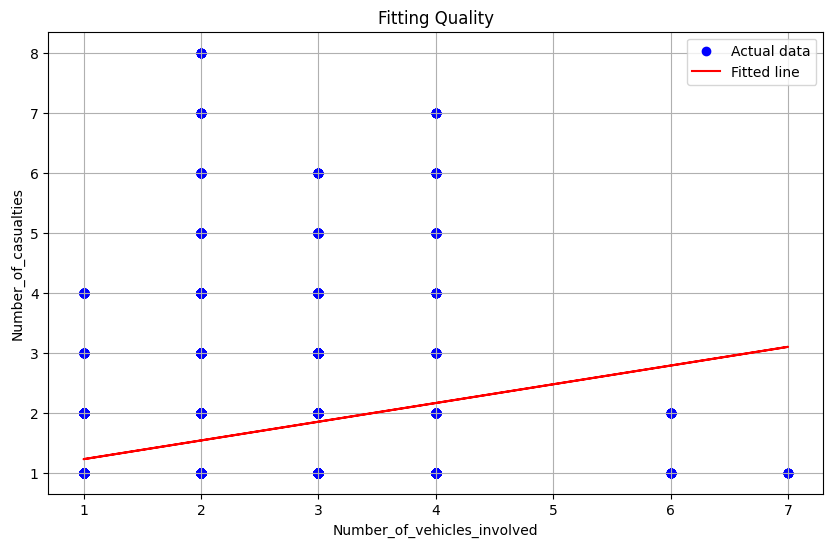

Mean Squared Error: 0.9681231082127384


In [27]:
def fit_model_and_visualize(df):
    """
    Fit a linear regression model and visualize the fitting quality.

    Args:
    - df (DataFrame): Input DataFrame containing the data.

    Returns:
    - mse (float): Mean squared error of the model.
    """
    # Select feature and target variables
    feature = 'Number_of_vehicles_involved'  # You can choose any other feature from the columns you provided
    target = 'Number_of_casualties'

    # Prepare feature and target data
    X = df[[feature]]
    y = df[target]

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)

    # Visualize the fitting quality
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', label='Fitted line')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('Fitting Quality')
    plt.legend()
    plt.grid(True)
    plt.show()

    return mse

# Assuming 'df' is your DataFrame containing the traffic accident data
mse = fit_model_and_visualize(df)
print("Mean Squared Error:", mse)


## PREDICTION WITH UNCERTAINTY

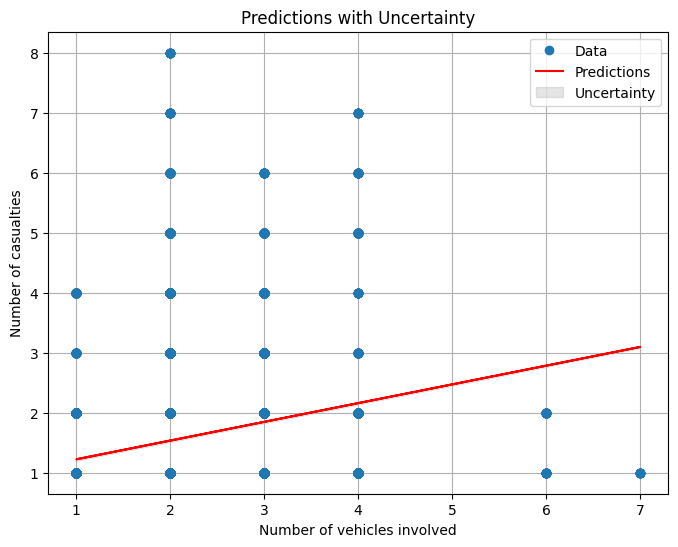

In [29]:
from scipy import stats

def perform_linear_regression(x, y):
    """
    Perform linear regression on the given data.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.

    Returns:
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - r_value: Correlation coefficient.
    - p_value: Two-tailed p-value for a hypothesis test whose null hypothesis is that the slope is zero.
    - std_err: Standard error of the estimate.
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, intercept, r_value, p_value, std_err

def generate_predictions(x, slope, intercept):
    """
    Generate predictions based on linear regression.

    Args:
    - x: Independent variable data.
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.

    Returns:
    - predictions: Predicted values.
    """
    predictions = slope * x + intercept
    return predictions

def plot_predictions_with_uncertainty(x, y, slope, intercept, std_err):
    """
    Plot predictions along with associated uncertainties.

    Args:
    - x: Independent variable data.
    - y: Dependent variable data.
    - slope: Slope of the regression line.
    - intercept: Intercept of the regression line.
    - std_err: Standard error of the estimate.
    """
    # Generate predictions
    predictions = generate_predictions(x, slope, intercept)

    # Plot predictions with associated uncertainties
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, predictions, 'r', label='Predictions')
    plt.fill_between(x, predictions - std_err, predictions + std_err, color='gray', alpha=0.2, label='Uncertainty')

    plt.xlabel('Number of vehicles involved')
    plt.ylabel('Number of casualties')
    plt.title('Predictions with Uncertainty')
    plt.legend()
    plt.grid(True)
    plt.show()


# Assuming 'df' is your DataFrame containing the traffic accident data
# Choose independent and dependent variables
x = df['Number_of_vehicles_involved']
y = df['Number_of_casualties']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = perform_linear_regression(x, y)

# Plot predictions with associated uncertainties
plot_predictions_with_uncertainty(x, y, slope, intercept, std_err)


## POLYNOMIAL AND EXPONENTIAL FITTING 

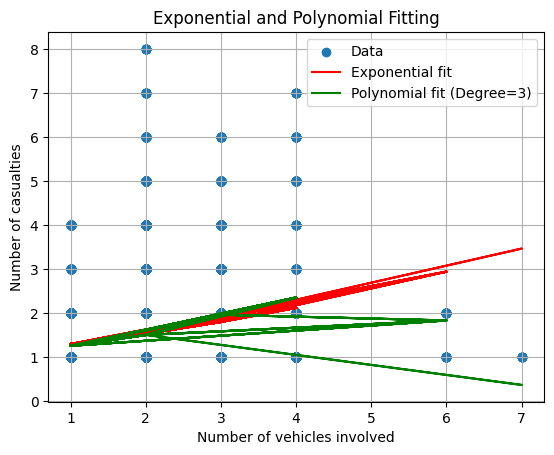

In [30]:
from scipy.optimize import curve_fit

def exponential_fit(x, y):
    """
    Perform exponential fitting on the given data.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - popt (array): Optimal parameters for the exponential fit.
    """
    # Define exponential function
    def exponential_func(x, a, b):
        return a * np.exp(b * x)

    # Fit the data to the exponential function
    popt, pcov = curve_fit(exponential_func, x, y)
    
    return popt

def polynomial_fit(x, y, degree=3):
    """
    Perform polynomial fitting on the given data.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.
    - degree (int): Degree of the polynomial.

    Returns:
    - coefficients (array): Coefficients of the polynomial fit.
    """
    # Fit the data to a polynomial function
    coefficients = np.polyfit(x, y, deg=degree)
    
    return coefficients

# Select features for fitting
x = df['Number_of_vehicles_involved'].values
y = df['Number_of_casualties'].values

# Perform exponential fitting
exp_params = exponential_fit(x, y)

# Perform polynomial fitting
poly_coefficients = polynomial_fit(x, y, degree=3)

# Plot the data and the fitted curves
plt.scatter(x, y, label='Data')
plt.plot(x, exp_params[0] * np.exp(exp_params[1] * x), color='red', label='Exponential fit')
plt.plot(x, np.poly1d(poly_coefficients)(x), color='green', label='Polynomial fit (Degree=3)')
plt.xlabel('Number of vehicles involved')
plt.ylabel('Number of casualties')
plt.title('Exponential and Polynomial Fitting')
plt.legend()
plt.grid(True)
plt.show()
